In [1]:
import pandas as pd
import re

# Load
df = pd.read_csv('../data/phrasebank.csv', encoding='ISO-8859-1')
df.columns = ['Sentiment', 'Text']
# Clean & label
df['Sentiment'] = df['Sentiment'].str.strip().str.capitalize()
label_map = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
df['Label'] = df['Sentiment'].map(label_map)
df = df[df['Label'].notna()]

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [2]:
# Split and Vectorize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_Text'], df['Label'], test_size=0.2, random_state=42, stratify=df['Label']
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [4]:
# Train XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

xgb_model.fit(X_train_vec, y_train)
y_pred_xgb = xgb_model.predict(X_test_vec)


c:\Users\varad\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:48:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier Performance:
              precision    recall  f1-score   support

    Negative       0.79      0.48      0.60       121
    Positive       0.79      0.49      0.60       273
     Neutral       0.75      0.94      0.83       575

    accuracy                           0.76       969
   macro avg       0.78      0.64      0.68       969
weighted avg       0.76      0.76      0.74       969



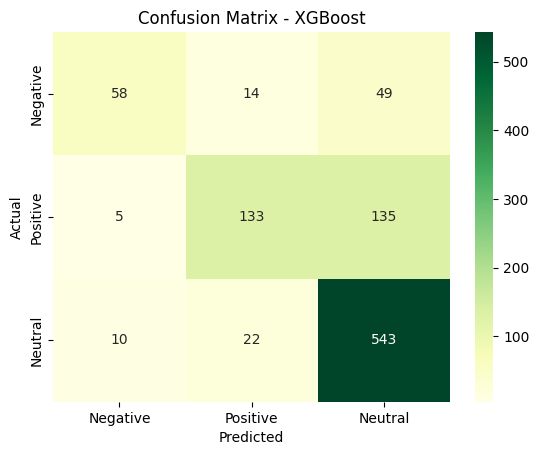

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("XGBoost Classifier Performance:")
print(classification_report(y_test, y_pred_xgb, target_names=['Negative', 'Positive', 'Neutral']))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='YlGn',
            xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [3]:
pip install xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 4.5/150.0 MB 26.9 MB/s eta 0:00:06
   -- ------------------------------------- 11.0/150.0 MB 29.9 MB/s eta 0:00:05
   ----- ---------------------------------- 19.4/150.0 MB 33.1 MB/s eta 0:00:04
   ------- -------------------------------- 27.3/150.0 MB 33.9 MB/s eta 0:00:04
   --------- ------------------------------ 34.9/150.0 MB 34.6 MB/s eta 0:00:04
   ----------- ---------------------------- 42.7/150.0 MB 35.3 MB/s eta 0:00:04
   ------------- -------------------------- 50.3/150.0 MB 35.6 MB/s eta 0:00:03
   --------------- ------------------------ 57.7/150.0 MB 35.7 MB/s eta 0:00:03
   ---------------- ----------------------- 63.7/150.0 MB 34.7 MB/s eta 0:00:03
   ------------------ --------------------- 69.2/150.0 MB 33.7 MB/s eta 0:00:03
   ------------------- -------------------- 74.4/150.0 MB 33.0 MB/s eta 0:00:03
   --------------------- ------------------ 80.0/